# Tarea 2.
## Valle Luna Jorge Alberto. 315076183.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from pylab import*
import seaborn as sns

In [2]:
import random

# <font color='blue'>Primero limpiamos la base que generé en la Tarea 1:</font> 

In [3]:
#'base_final.csv'
df= pd.read_csv('base_final.csv', index_col=0)

In [4]:
df.head(10)

,_id_,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,credito_1si_0no
0,78213,0.000000,b'0',11.0,58.0,2.0,9.0,260.869565,25.854639,56.0,-230,0.33522,1
1,76457,0.000000,b'1',28.0,45.0,1.0,4.0,40.579710,2.872738,62.0,-230,0.33334,1
2,8329,0.000000,b'1',14.0,59.0,3.0,3.0,349.275362,34.616490,94.0,-230,0.29112,1
3,68389,2026.342452,b'1',1.0,67.0,2.0,9.0,276.811594,27.434645,125.0,-230,0.27318,1
4,45732,3546.099291,b'1',15.0,70.0,1.0,9.0,640.579710,63.487504,81.0,-230,0.32988,1
5,35742,506.585613,b'0',9.0,50.0,3.0,3.0,217.391304,21.545533,114.0,-230,0.35514,1
6,53185,759.878419,b'1',23.0,58.0,1.0,9.0,200.000000,19.821890,109.0,-230,0.37000,1
7,98701,0.000000,b'1',19.0,50.0,3.0,9.0,558.840580,55.386383,125.0,-230,0.36508,1
8,82374,0.000000,b'1',22.0,61.0,1.0,9.0,214.202899,21.229532,37.0,-230,0.31664,1
9,86932,2532.928065,b'1',26.0,59.0,3.0,9.0,420.289855,41.654697,118.0,-230,0.33008,1


In [5]:
df=df.drop('_id_',1)
df.head(10)

<ipython-input-5-b11d8e9601f9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('_id_',1)


,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,credito_1si_0no
0,0.000000,b'0',11.0,58.0,2.0,9.0,260.869565,25.854639,56.0,-230,0.33522,1
1,0.000000,b'1',28.0,45.0,1.0,4.0,40.579710,2.872738,62.0,-230,0.33334,1
2,0.000000,b'1',14.0,59.0,3.0,3.0,349.275362,34.616490,94.0,-230,0.29112,1
3,2026.342452,b'1',1.0,67.0,2.0,9.0,276.811594,27.434645,125.0,-230,0.27318,1
4,3546.099291,b'1',15.0,70.0,1.0,9.0,640.579710,63.487504,81.0,-230,0.32988,1
5,506.585613,b'0',9.0,50.0,3.0,3.0,217.391304,21.545533,114.0,-230,0.35514,1
6,759.878419,b'1',23.0,58.0,1.0,9.0,200.000000,19.821890,109.0,-230,0.37000,1
7,0.000000,b'1',19.0,50.0,3.0,9.0,558.840580,55.386383,125.0,-230,0.36508,1
8,0.000000,b'1',22.0,61.0,1.0,9.0,214.202899,21.229532,37.0,-230,0.31664,1
9,2532.928065,b'1',26.0,59.0,3.0,9.0,420.289855,41.654697,118.0,-230,0.33008,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43822 entries, 0 to 43821
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comp_interno1    43822 non-null  float64
 1   comp_interno2    43822 non-null  object 
 2   comp_interno3    43822 non-null  float64
 3   comp_interno4    43822 non-null  float64
 4   categoria1       43822 non-null  float64
 5   categoria2       43822 non-null  float64
 6   comp_externo1    43822 non-null  float64
 7   comp_externo2    43822 non-null  float64
 8   comp_externo3    43816 non-null  float64
 9   comp_externo4    43822 non-null  int64  
 10  comp_mixto1      43822 non-null  float64
 11  credito_1si_0no  43822 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 4.3+ MB


# a) Empezamos por cambiar la variable categórica 'comp_interno2' de tipo 'String' a tipo 'int'

In [7]:
#Creamos un vector de ceros, de la misma longitud que el numero de observaciones en la base:
s=pd.Series(0, index=np.arange(len(df['comp_interno2'])))

#Cambiamos todos los b'1' por 1:
s[df['comp_interno2']=="b'1'"]=1

#Insertamos el vector a la base, y removemos el vector tipo 'String':
df.insert(loc=2, column="comp_interno2_c", value=s, allow_duplicates=False)
df=df.drop(labels=['comp_interno2'], axis=1)

# b) Después tratamos las observaciones que tengan alguna variable explicativa nula:

In [8]:
#Vemos que la variable 'comp_externo3' tiene 6 nulls:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43822 entries, 0 to 43821
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comp_interno1    43822 non-null  float64
 1   comp_interno2_c  43822 non-null  int64  
 2   comp_interno3    43822 non-null  float64
 3   comp_interno4    43822 non-null  float64
 4   categoria1       43822 non-null  float64
 5   categoria2       43822 non-null  float64
 6   comp_externo1    43822 non-null  float64
 7   comp_externo2    43822 non-null  float64
 8   comp_externo3    43816 non-null  float64
 9   comp_externo4    43822 non-null  int64  
 10  comp_mixto1      43822 non-null  float64
 11  credito_1si_0no  43822 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 4.3 MB


In [9]:
#Como solo son 6 observaciones, yo prefiero quitarlas de la base:
bool_series = pd.notnull(df['comp_externo3']) 
bool_series = bool_series[bool_series==False]
df.iloc[bool_series.index]
df=df.drop(bool_series.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43816 entries, 0 to 43821
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comp_interno1    43816 non-null  float64
 1   comp_interno2_c  43816 non-null  int64  
 2   comp_interno3    43816 non-null  float64
 3   comp_interno4    43816 non-null  float64
 4   categoria1       43816 non-null  float64
 5   categoria2       43816 non-null  float64
 6   comp_externo1    43816 non-null  float64
 7   comp_externo2    43816 non-null  float64
 8   comp_externo3    43816 non-null  float64
 9   comp_externo4    43816 non-null  int64  
 10  comp_mixto1      43816 non-null  float64
 11  credito_1si_0no  43816 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 4.3 MB


# <font color='blue'>Despues programo un método para separar las muestras de training y de test, de tal modo que en la muestra de training tenga igual numero de observaciones con variable de respuesta credito_1si_0no=1, y credito_1si_0no=0</font> 


In [10]:
#Tenemos un sesgo en las clases de la variable de respuesta:

X = df.copy()
y= X.pop('credito_1si_0no')

X_0=X[y==0]
X_1=X[y==1]

print('No. observaciones con credito_1si_0no=0: {}'.format(len(X_0)))
print('No. observaciones con credito_1si_0no=1: {}'.format(len(X_1)))


No. observaciones con credito_1si_0no=0: 876
No. observaciones con credito_1si_0no=1: 42940


In [11]:
def train_test_split(base, test_size = 0.30, random_state = 100):
    random.seed(random_state)
    
    X=base.copy() 
    y= X.pop('credito_1si_0no')
    
    X_0=base[y==0]
    X_1=base[y==1]

    training_size0=int((1-test_size)*len(X_0))

    i0=random.sample(list(X_0.index.to_list()), training_size0)
    i1=random.sample(list(X_1.index.to_list()), training_size0)

    index0 = X_0.index.isin(i0)
    index1 = X_1.index.isin(i1)

    X_0test=X_0[~index0]
    X_1test=X_1[~index1]

    X_0train=X_0.loc[i0]
    X_1train=X_1.loc[i1]



    print(len(X_1train))
    print(len(X_0train))
    print(len(X_0test))
    print(len(X_1test))

    X_train=pd.concat([X_0train,X_1train], axis=0)
    X_test=pd.concat([X_0test,X_1test], axis=0)
    y_train = X_train.pop('credito_1si_0no')
    y_test = X_test.pop('credito_1si_0no')
    return X_train, X_test, y_train, y_test

# 1.- Hacer un modelo regresión logistica con woes con la tabla que generaron en la tarea 1.

Al no poder instalar el paquete 'optbinning' en mi computadora, decidí obtener la tabla de WOES en R, a partir de la tabla que generé en la tarea 1, con ayuda del archivo 'T2_1.R':

In [12]:
df_WOE= pd.read_csv('base_WOES.csv')
df_WOE.head(5)

,credito_1si_0no,WoE_comp_interno1,WoE_comp_interno2,WoE_comp_interno3,WoE_comp_interno4,WoE_categoria1,WoE_categoria2,WoE_comp_externo1,WoE_comp_externo2,WoE_comp_externo3,WoE_comp_externo4,WoE_comp_mixto1
0,1,-3.512234,-1.424997,25.480470,15.430694,-34.835067,-7.300074,-44.835068,-43.646610,79.139435,-15.030518,-80.097634
1,1,-3.512234,0.568378,67.359497,-20.114799,38.062158,90.829516,81.834293,66.476932,79.139435,-15.030518,-80.097634
2,1,-3.512234,0.568378,-47.234287,15.430694,-75.821733,-61.487001,-44.835068,-43.646610,2.665439,-15.030518,-80.097634
3,1,3.760202,0.568378,-27.734462,15.430694,-34.835067,-7.300074,-44.835068,-43.646610,-225.708899,-15.030518,-80.097634
4,1,3.760202,0.568378,50.403136,-26.725301,38.062158,-7.300074,-44.835068,-43.646610,2.665439,-15.030518,-80.097634


<b><font color='red'>En la variable 'WoE_categoria2' hay 102 observaciones con valor '-inf', y en 'WoE_comp_externo4' hay 1. Las eliminamos:</font></b>

In [13]:
df_WOE['WoE_categoria2'].value_counts()

-7.300074      28907
 40.150102      5477
-61.487001      2658
-0.189232       1804
-29.746176      1541
-99.492860       935
 3.541845        773
 90.829516       706
 55.744070       407
 15.452336       344
 105.897964      162
-inf             102
Name: WoE_categoria2, dtype: int64

In [14]:
df_WOE['WoE_comp_externo4'].value_counts()

-15.030518     40462
 102.869424     3260
-42.529513        76
 111.960426       17
-inf               1
Name: WoE_comp_externo4, dtype: int64

In [15]:
df_WOE=df_WOE.drop([x for x in df_WOE.index if df_WOE['WoE_categoria2'].loc[x]==float('-inf')])
df_WOE=df_WOE.drop([x for x in df_WOE.index if df_WOE['WoE_comp_externo4'].loc[x]==float('-inf')])

In [16]:
df_WOE['WoE_categoria2'].value_counts()

-7.300074      28906
 40.150102      5477
-61.487001      2658
-0.189232       1804
-29.746176      1541
-99.492860       935
 3.541845        773
 90.829516       706
 55.744070       407
 15.452336       344
 105.897964      162
Name: WoE_categoria2, dtype: int64

In [17]:
df_WOE['WoE_comp_externo4'].value_counts()

-15.030518     40369
 102.869424     3251
-42.529513        76
 111.960426       17
Name: WoE_comp_externo4, dtype: int64

<b>Separamos muestras de entrenamiento y validacion y ajustamos el modelo</b>

In [18]:
X_woe_train, X_woe_test, y_woe_train, y_woe_test=train_test_split(df_WOE, test_size = 0.30)

613
613
263
42224


In [19]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_woe_train)

<b>Calculamos GINI y ROC en entrenamiento</b>

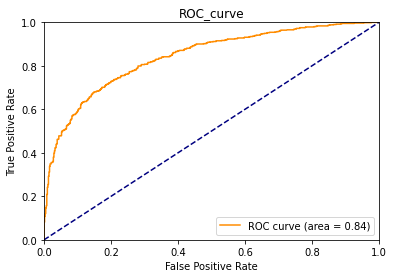

ROC_entremaniemto= 0.84
Gini_entremaniemto= 0.6799999999999999


In [20]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_woe_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()
ROC=0.84

print('ROC_entremaniemto= {}'.format(ROC))
print('Gini_entremaniemto= {}'.format(2*ROC-1))

<b>Calculamos KS en entrenamiento. Obtenemos ks=0.1141. Esto nos dice que nuestro modelo no puede distinguir muy bien las clases 'credito_1si_0no=0' y 'credito_1si_0no=1'</b>

In [21]:
y_pred=[(clf.predict_proba(X_woe_train.loc[x,].to_numpy().reshape(1,-1))).max() for x in X_woe_train.index]

fpr, tpr, thresholds= roc_curve(y_woe_train, y_pred)
ks=max(tpr-fpr)
ks

0.11419249592169659

<b>Calculamos GINI y ROC en validacion</b>

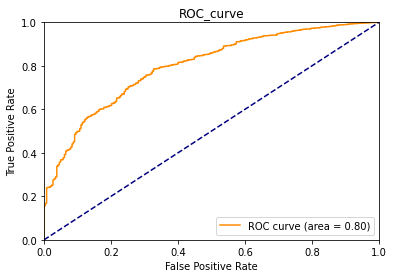

ROC_validacion= 0.8
Gini_validacion= 0.6000000000000001


In [22]:
y_pred=clf.predict(X_woe_test)
y_pred1=clf.decision_function(X_woe_test)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_woe_test, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()
ROC=0.8

print('ROC_validacion= {}'.format(ROC))
print('Gini_validacion= {}'.format(2*ROC-1))

<b>Calculamos KS en validación. Obtenemos ks=0.1174. Esto nos dice que nuestro modelo no puede distinguir muy bien las clases 'credito_1si_0no=0' y 'credito_1si_0no=1'</b>

In [23]:
y_pred=[(clf.predict_proba(X_woe_test.loc[x,].to_numpy().reshape(1,-1))).max() for x in X_woe_test.index]

fpr, tpr, thresholds= roc_curve(y_woe_test, y_pred)
ks=max(tpr-fpr)
ks

0.11747558197669644

# 2.- Hacer un arbol de clasificación con la misma tabla del problema 1.

In [24]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()


    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

# Paso 2. Separamos la muestra de training de la de test.

Los datos se separan de tal manera que tengamos igual numero de observaciones con variable de respuesta credito_1si_0no=0 que credito_1si_0no=1, en la muestra de training.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.2)

700
700
176
42240


# Paso 3. Ajustamos un modelo de arbol de clasificacion a la muestra de training.

In [26]:
dec_tree = DecisionTreeClassifier(random_state=42)
tree_pipeline = Pipeline(steps=[('classifier', dec_tree)])
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('classifier', DecisionTreeClassifier(random_state=42))])

# Paso 4. Aplicamos el modelo a la muestra de test, y generamos un reporte.

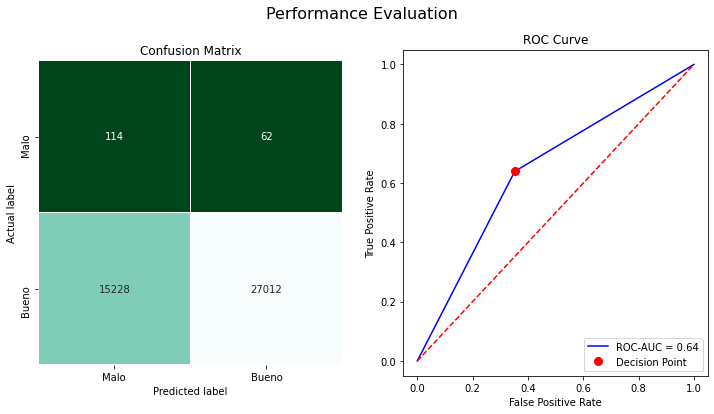

In [27]:
LABELS = ['Malo', 'Bueno']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

# Paso 5. Obtenemos ROC y Gini en validación:

Del reporte tenemos que ROC=0.64. Sabemos que Gini=2*ROC-1=0.28.

In [28]:
ROC=0.64
print("ROC: {}".format(ROC))
print("Gini: {}".format(2*ROC-1))

ROC: 0.64
Gini: 0.28


# 3.- Seleccionar con validación cruzada cuál es el mejor modelo de los dos problemas anteriores.


## Para las métricas 'accuracy', 'precision', las cuales son las más fáciles de interpretar para mí, claramente el modelo de regresión logística con WOEs es el ganador.

## Además, podemos confirmar esto comparando las matrices de confusión de ambos modelos (regresión clasifica 193 malos como malos, y el arbol solo 114), y también sus AUCs:

In [29]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold
                                                 )

from sklearn.linear_model import LogisticRegressionCV

<b>Para el modelo de regresión logística tenemos: </b>

In [30]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

scores = cross_validate(clf, X_woe_train, y_woe_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

print("Se tiene una efectividad de predicción de %0.2f y una desviación estandar de %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("y una predicción de buenos de %0.2f y desviación estandar de %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))

Se tiene una efectividad de predicción de 0.76 y una desviación estandar de 0.02
y una predicción de buenos de 0.77 y desviación estandar de 0.02


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Recall (Test set): 0.7177


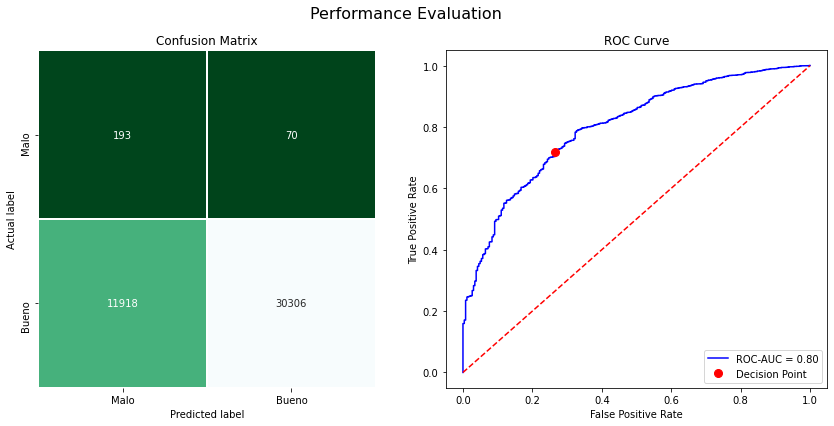

In [37]:
classifier_gs_log = LogisticRegressionCV(cv=k_fold, scoring='recall', n_jobs=-1, verbose=1, random_state=1000)
classifier_gs_log.fit(X_woe_train, y_woe_train)

print(f'Recall (Test set): {metrics.recall_score(y_woe_test, classifier_gs_log.predict(X_woe_test)):.4f}')

LABELS = ['Malo', 'Bueno']
woe_gs_perf = performance_evaluation_report(classifier_gs_log, X_woe_test, 
                                             y_woe_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
plt.show()

<b>Para el arbol tenemos: </b>

In [32]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

scores = cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

print("Se tiene una efectividad de predicción de %0.2f y una desviación estandar de %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("y una predicción de buenos de %0.2f y desviación estandar de %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))

Se tiene una efectividad de predicción de 0.62 y una desviación estandar de 0.03
y una predicción de buenos de 0.62 y desviación estandar de 0.04


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 7}
Recall (Training set): 0.6757
Recall (Test set): 0.7478


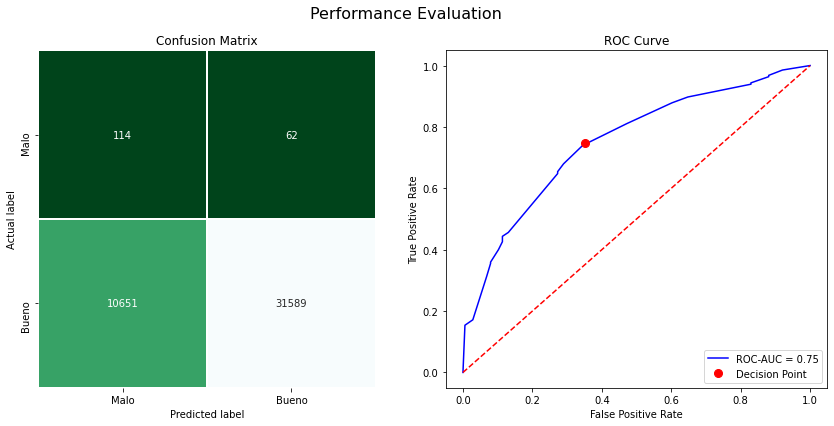

In [33]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}


classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)

print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

LABELS = ['Malo', 'Bueno']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
plt.show()

# 4.- Obtener los puntos óptimos de decisión para el modelo seleccionado.

## El modelo seleccionado fue el de regresión. Con cross-validation tenemos:

In [38]:
y_pred = classifier_gs_log.predict(X_woe_test)

cm = metrics.confusion_matrix(y_woe_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print('Decision point: (false positive rate={},  true positive rate={})'.format(fp/(fp+tn), tp/(tp+fn)))

Decision point: (false positive rate=0.2661596958174905,  true positive rate=0.7177434634331186)


Recall (Test set): 0.7177


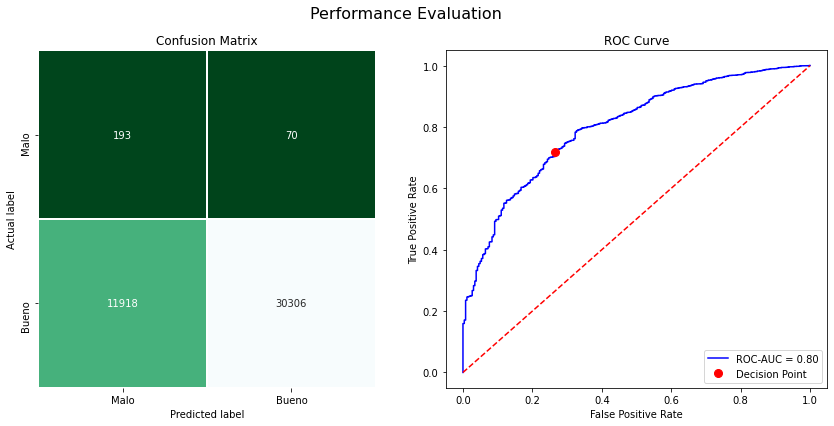

In [39]:
print(f'Recall (Test set): {metrics.recall_score(y_woe_test, classifier_gs_log.predict(X_woe_test)):.4f}')

LABELS = ['Malo', 'Bueno']
woe_gs_perf = performance_evaluation_report(classifier_gs_log, X_woe_test, 
                                             y_woe_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
plt.show()